# Project: The Movie DataBase Analysis
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>**In this project we'll be analyzing data associated with Movies in the last 60 years until 2015**

In particular we'll be interested in finding trends among the popular movies 

>__This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.__

Questions that I plan on exploring over the Project:
<ul>
    <li>Which genres are most popular from year to year? </li>
    <li>What kinds of properties are associated with movies that have high revenues?</li>
</ul>


>**Describe the questions one independent var which it is genres and 3 dependent vars which they are popular, revenues and vote_average**

### import the Packages and include a 'magic word' so that your visualizations are plotted

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

#### Load dataset and print out a few lines

In [2]:
#Load dataset and print out a few lines.Perform operations to inspect data
df = pd.read_csv("tmdb-movies.csv")
#   types and look for instances of missing or possibly errant data.
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#to view the number of rows and columns
df.shape

(10866, 21)

In [4]:
#Describe the data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [6]:
#view information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

<a id='cleaning'></a>
### Data Cleaning

#### After discussing the structure of the data and any problems that need to be cleaned, perform those cleaning steps.

In [7]:
#drop un necessary columns
df.drop(['id','imdb_id','homepage','director','tagline','keywords','overview','production_companies','release_date'], axis=1, inplace=True)

In [8]:
#view remaining columns 
df.head()

,popularity,budget,revenue,original_title,cast,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


In [9]:
#view the null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   budget          10866 non-null  int64  
 2   revenue         10866 non-null  int64  
 3   original_title  10866 non-null  object 
 4   cast            10790 non-null  object 
 5   runtime         10866 non-null  int64  
 6   genres          10843 non-null  object 
 7   vote_count      10866 non-null  int64  
 8   vote_average    10866 non-null  float64
 9   release_year    10866 non-null  int64  
 10  budget_adj      10866 non-null  float64
 11  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1018.8+ KB


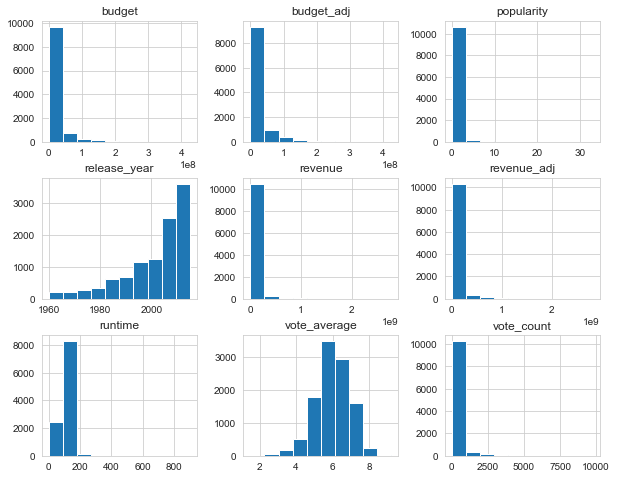

In [10]:
#some visualization by histogram plotting
df.hist(figsize=(10,8));

In [11]:
#df[df.cast.isnull()].hist(figsize=(10,8))
#view the null rows of cast 
df[df.cast.isnull()]

,popularity,budget,revenue,original_title,cast,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
371,0.422901,0,0,Sanjay's Super Team,NaN,7,Animation,47,6.9,2015,0.000000,0.0
441,0.220751,0,0,Winter on Fire: Ukraine's Fight for Freedom,NaN,98,Documentary,37,8.2,2015,0.000000,0.0
465,0.201696,0,0,Bitter Lake,NaN,135,Documentary,19,7.8,2015,0.000000,0.0
536,0.122543,0,0,A Faster Horse,NaN,90,Documentary,12,8.0,2015,0.000000,0.0
538,0.114264,0,0,The Mask You Live In,NaN,88,Documentary,11,8.9,2015,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9677,0.253376,0,0,Red's Dream,NaN,4,Animation,44,6.6,1987,0.000000,0.0
9755,0.046272,0,0,The Big Shave,NaN,6,Drama,12,6.7,1968,0.000000,0.0
10434,0.146906,200,0,Six Men Getting Sick,NaN,4,Animation,16,5.2,1967,1307.352748,0.0
10550,0.306425,0,0,Luxo Jr.,NaN,2,Animation|Family,81,7.3,1986,0.000000,0.0


In [12]:
#drop the null rows and update the dataset then view the information
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10768 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10768 non-null  float64
 1   budget          10768 non-null  int64  
 2   revenue         10768 non-null  int64  
 3   original_title  10768 non-null  object 
 4   cast            10768 non-null  object 
 5   runtime         10768 non-null  int64  
 6   genres          10768 non-null  object 
 7   vote_count      10768 non-null  int64  
 8   vote_average    10768 non-null  float64
 9   release_year    10768 non-null  int64  
 10  budget_adj      10768 non-null  float64
 11  revenue_adj     10768 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1.1+ MB


We found that no null values 

In [13]:
# check for duplicates in the data
sum(df.duplicated())

1

In [14]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [15]:
# confirm correction by rechecking for duplicates in the data
sum(df.duplicated())

0

<a id='eda'></a>
## Exploratory Data Analysis

>Data wrangling phase :As it is evident from the above table, we don't have revenue and budget information for all the movies. We have revenue information only for 4850 movies and budget information for only 5170 movies out of 10866 movie details avaliable. I am planning to use Panda function dropna to handle this null values when I am plotting a visualization

>As first part of the analysis we are going to separate the genre details along with years to analyze the data. The DataFrame provides information about the number of movies in each genre for every year.

### Question 1: Which genres are most popular from year to year?

In [16]:
# Obtaining a list of genres
genre_details = list(map(str,(df['genres'])))
genre = []
for i in genre_details:
    split_genre = list(map(str, i.split('|')))
    #print(split_genre)
    for j in split_genre:
        if j not in genre:
            genre.append(j)
# printing list of seperated genres.
print(genre)

['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy', 'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy', 'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror', 'Documentary', 'TV Movie', 'Foreign']


In [17]:
genre_details = pd.get_dummies(df['genres'])
df=pd.concat([df, genre_details], axis=1)
df.drop(df['genres'], axis=1, inplace=True)
df.head()

,popularity,budget,revenue,original_title,cast,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


>There are 20 different genres

Next I obtain the range of years in the dataset

In [18]:
# minimum range value
min_year = df['release_year'].min()
# maximum range value
max_year = df['release_year'].max()
# print the range
print(min_year, max_year)

1960 2015


In [19]:
# Creating a dataframe with genre as index and years as columns
genre_df = pd.DataFrame(index = genre, columns = range(min_year, max_year + 1))
# to fill not assigned values to zero
genre_df = genre_df.fillna(value = 0)
print (genre_df.head())

                 1960  1961  1962  1963  1964  1965  1966  1967  1968  1969  \
Action              0     0     0     0     0     0     0     0     0     0   
Adventure           0     0     0     0     0     0     0     0     0     0   
Science Fiction     0     0     0     0     0     0     0     0     0     0   
Thriller            0     0     0     0     0     0     0     0     0     0   
Fantasy             0     0     0     0     0     0     0     0     0     0   

                 ...  2006  2007  2008  2009  2010  2011  2012  2013  2014  \
Action           ...     0     0     0     0     0     0     0     0     0   
Adventure        ...     0     0     0     0     0     0     0     0     0   
Science Fiction  ...     0     0     0     0     0     0     0     0     0   
Thriller         ...     0     0     0     0     0     0     0     0     0   
Fantasy          ...     0     0     0     0     0     0     0     0     0   

                 2015  
Action              0  
Adventur

Here I create an array of years to access the various movies in each year and split the genres and increment the value of genre in the correspoding position in the dataframe.

In [20]:
# list of years of each movie
year = np.array(df['release_year'])
# index to access year value
z = 0
for i in genre_details:
    split_genre = list(map(str,i.split('|')))
    for j in split_genre:
        genre_df.loc[j, year[z]] = genre_df.loc[j, year[z]] + 1
    z+=1
genre_df

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Action,0,0,0,0,0,0,0,0,0,0,...,0,0,0,118,33,0,0,0,97,465
Adventure,0,0,0,0,0,0,0,0,0,0,...,0,0,0,88,19,0,0,0,82,389
Science Fiction,0,0,0,0,0,0,0,0,0,0,...,0,0,0,161,26,0,0,0,106,167
Thriller,0,0,0,0,0,0,0,0,0,0,...,0,0,0,181,98,0,0,0,187,194
Fantasy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,131,9,0,0,0,116,153
Crime,0,0,0,0,0,0,0,0,0,0,...,0,0,0,82,31,0,0,0,161,91
Western,0,0,0,0,0,0,0,0,0,0,...,0,0,0,7,22,0,0,0,20,33
Drama,0,0,0,0,0,0,0,0,0,0,...,0,0,0,197,69,0,0,0,410,206
Family,0,0,0,0,0,0,0,0,0,0,...,0,0,0,77,3,0,0,0,169,136
Animation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,40,2,0,0,0,97,98


### Question 2:  What kinds of properties are associated with movies that have high revenues?

>Next a pie chart is created which depicts the count of movies released in each genre over the years according to the given dataset. The top 10 genres are displayed and the remaining genres are displayed under the label others.

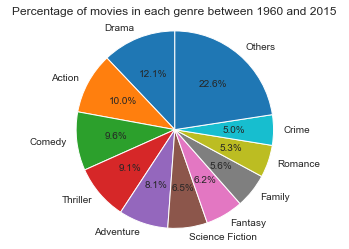

In [21]:
# number of movies in each genre so far.
genre_count = {}
genre = []
for i in genre_details:
    split_genre = list(map(str,i.split('|')))
    for j in split_genre:
        if j in genre:
            genre_count[j] = genre_count[j] + 1
        else:
            genre.append(j)
            genre_count[j] = 1
gen_series = pd.Series(genre_count)
# pi chart
gen_series = gen_series.sort_values(ascending = False)
label = list(map(str,gen_series[0:10].keys()))
label.append('Others')
gen = gen_series[0:10]
sum = 0
for i in gen_series[10:]:
    sum += i
gen['sum'] = sum
fig1, ax1 = plt.subplots()
ax1.pie(gen,labels = label, autopct = '%1.1f%%', startangle = 90)
ax1.axis('equal')
plt.title("Percentage of movies in each genre between 1960 and 2015")
plt.show()


>The above chart the number of movies in each genre over the years. We can interpret that most of movies released were in Drama followed by Comedy and so on. Therefore the number of movies in the genre drama is higher than the others compared. The plot depicts the top ten genres and others depicts the count of movies in the remaining genres.

>Next a seperate table is created as a dataframe in a similar manner as above to hold the popularity value of the movies according to their genres for every year.

In [22]:
# Creating a dataframe with genre as index and years as columns to get a count of popularity
popularity_df = pd.DataFrame(index = genre, columns = range(min_year, max_year + 1))
# to fill not assigned values to zero
popularity_df = popularity_df.fillna(value = 0.0)
print(popularity_df.head())

           1960  1961  1962  1963  1964  1965  1966  1967  1968  1969  ...  \
Action      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Adventure   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Animation   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Comedy      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Drama       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

           2006  2007  2008  2009  2010  2011  2012  2013  2014  2015  
Action      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
Adventure   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
Animation   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
Comedy      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
Drama       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 56 columns]


>An array is created which holds all the popularity details and it is checked for null values to see whether there is any unavalability of popularity in any of the datarows in the given dataset.

In [23]:
# list of popularity levels of each movie
popularity = np.array(df['popularity'])
# to check whether any popularity is zero.
print (len(popularity[popularity==0]))
# index to access year value
z = 0
for i in genre_details:
    split_genre = list(map(str,i.split('|')))
    for j in split_genre:
            popularity_df.loc[j, year[z]] = popularity_df.loc[j, year[z]] + popularity[z]
    z+=1
popularity_df

0


,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Action,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,50.401712,46.290292,0.0,0.0,0.0,64.512005,622.321737
Adventure,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,39.258885,17.971545,0.0,0.0,0.0,128.021255,479.495967
Animation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,27.604085,1.508694,0.0,0.0,0.0,330.523142,136.801452
Comedy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,140.529704,39.092019,0.0,0.0,0.0,403.144249,209.515463
Drama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,120.853368,98.069911,0.0,0.0,0.0,191.043810,217.134039
Family,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,54.582580,2.927918,0.0,0.0,0.0,272.922543,128.396278
Fantasy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,170.245703,13.042104,0.0,0.0,0.0,177.617996,111.632564
Mystery,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,50.863662,50.305933,0.0,0.0,0.0,47.861474,51.543701
Science Fiction,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,84.651603,35.328367,0.0,0.0,0.0,113.533471,131.868105
Horror,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,92.235919,56.138171,0.0,0.0,0.0,44.588471,48.520927


In [24]:
# function to standardize the popularity of values in dataframe.
def standardize(p):
    p_std = (p - p.mean()) / p.std(ddof = 0)
    return p_std

In [25]:
popularity_std = standardize(popularity_df)
popularity_std

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Action,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.113717,0.266718,NaN,NaN,NaN,-0.437949,3.168353
Adventure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.355997,-0.429515,NaN,NaN,NaN,0.148241,2.249108
Animation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.609409,-0.834264,NaN,NaN,NaN,2.017330,0.043480
Comedy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.845948,0.089744,NaN,NaN,NaN,2.687622,0.511477
Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.418123,1.539749,NaN,NaN,NaN,0.729938,0.560511
Family,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.022812,-0.799371,NaN,NaN,NaN,1.485677,-0.010617
Fantasy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.492068,-0.550708,NaN,NaN,NaN,0.606018,-0.118510
Mystery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.103673,0.365444,NaN,NaN,NaN,-0.591633,-0.505250
Science Fiction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.630983,-0.002788,NaN,NaN,NaN,0.014519,0.011728
Horror,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.795890,0.508833,NaN,NaN,NaN,-0.621843,-0.524705


In [26]:
# Creating a series to hold the popular genre for every year.
pop_genre = pd.Series(index = range(min_year, max_year + 1))
pop_genre.head()

C:\Users\A11-hpf550\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


1960   NaN
1961   NaN
1962   NaN
1963   NaN
1964   NaN
dtype: float64

In [27]:
# to identify the genre with maximum standardized popularity value
for i in range(min_year, max_year + 1):
    pop_genre[i] = popularity_std[i].argmax()
pop_genre

1960    -1.0
1961    -1.0
1962    -1.0
1963    -1.0
1964    -1.0
1965    -1.0
1966    -1.0
1967    -1.0
1968    -1.0
1969    -1.0
1970    -1.0
1971    -1.0
1972    -1.0
1973    -1.0
1974    -1.0
1975    -1.0
1976    -1.0
1977     5.0
1978    -1.0
1979    -1.0
1980    -1.0
1981    -1.0
1982    -1.0
1983    -1.0
1984    -1.0
1985    -1.0
1986    -1.0
1987    -1.0
1988    -1.0
1989    -1.0
1990    -1.0
1991    -1.0
1992    -1.0
1993    -1.0
1994    -1.0
1995    -1.0
1996    -1.0
1997    -1.0
1998    -1.0
1999    -1.0
2000    -1.0
2001    -1.0
2002    -1.0
2003    -1.0
2004    -1.0
2005    -1.0
2006    -1.0
2007    -1.0
2008    -1.0
2009     6.0
2010    11.0
2011    -1.0
2012    -1.0
2013    -1.0
2014     3.0
2015     0.0
dtype: float64

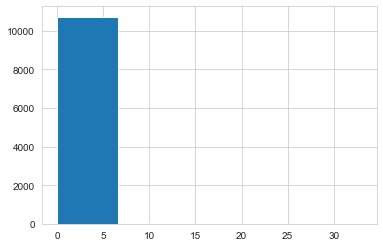

In [28]:
#plotting popularity column on a histogram as a 1D exploration
plt.hist(df["popularity"], bins=5);

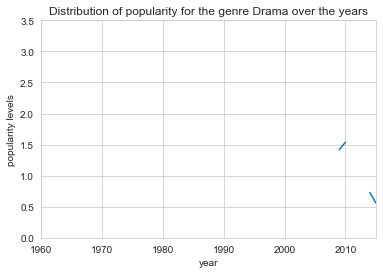

In [32]:
# to plot a histogram of genre 'Drama'.
plt.plot(popularity_std.loc['Drama'])
plt.xlabel('year')
plt.ylabel('popularity levels')
plt.title('Distribution of popularity for the genre Drama over the years')
plt.axis([1960, 2015, 0, 3.5])
plt.show()

## limitations

I found it hard to use pd.get_dummies instead of for loops to meet my specifications
It doesn't made any sence as  want, SO I Keep both two ways.

<a id='conclusions'></a>
## Conclusions

>I found that the most popular genre in most of the years is Drama. 
The table gives a list of the most popular genres from 1960 to 2015. 
The graphs shows the popularity distribution of the genre drama over the years in the given dataset and the distribution of genres in the movie set.